# **Import Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# **Created a Dummy Dataset**

In [2]:
data = {
    'income': [40000, 50000, 60000, 30000, 70000],
    'debt': [5000, 10000, 7000, 2000, 15000],
    'credit_history': [1, 0, 1, 1, 0],  # 1 = Good, 0 = Bad
    'loan_amount': [10000, 20000, 15000, 5000, 25000],
    'creditworthy': [1, 0, 1, 1, 0]     # 1 = Yes, 0 = No
}

df = pd.DataFrame(data)


# **Explore and Preprocess the Data**

   income   debt  credit_history  loan_amount  creditworthy
0   40000   5000               1        10000             1
1   50000  10000               0        20000             0
2   60000   7000               1        15000             1
3   30000   2000               1         5000             1
4   70000  15000               0        25000             0
             income          debt  credit_history  loan_amount  creditworthy
count      5.000000      5.000000        5.000000      5.00000      5.000000
mean   50000.000000   7800.000000        0.600000  15000.00000      0.600000
std    15811.388301   4969.909456        0.547723   7905.69415      0.547723
min    30000.000000   2000.000000        0.000000   5000.00000      0.000000
25%    40000.000000   5000.000000        0.000000  10000.00000      0.000000
50%    50000.000000   7000.000000        1.000000  15000.00000      1.000000
75%    60000.000000  10000.000000        1.000000  20000.00000      1.000000
max    70000.000000  150

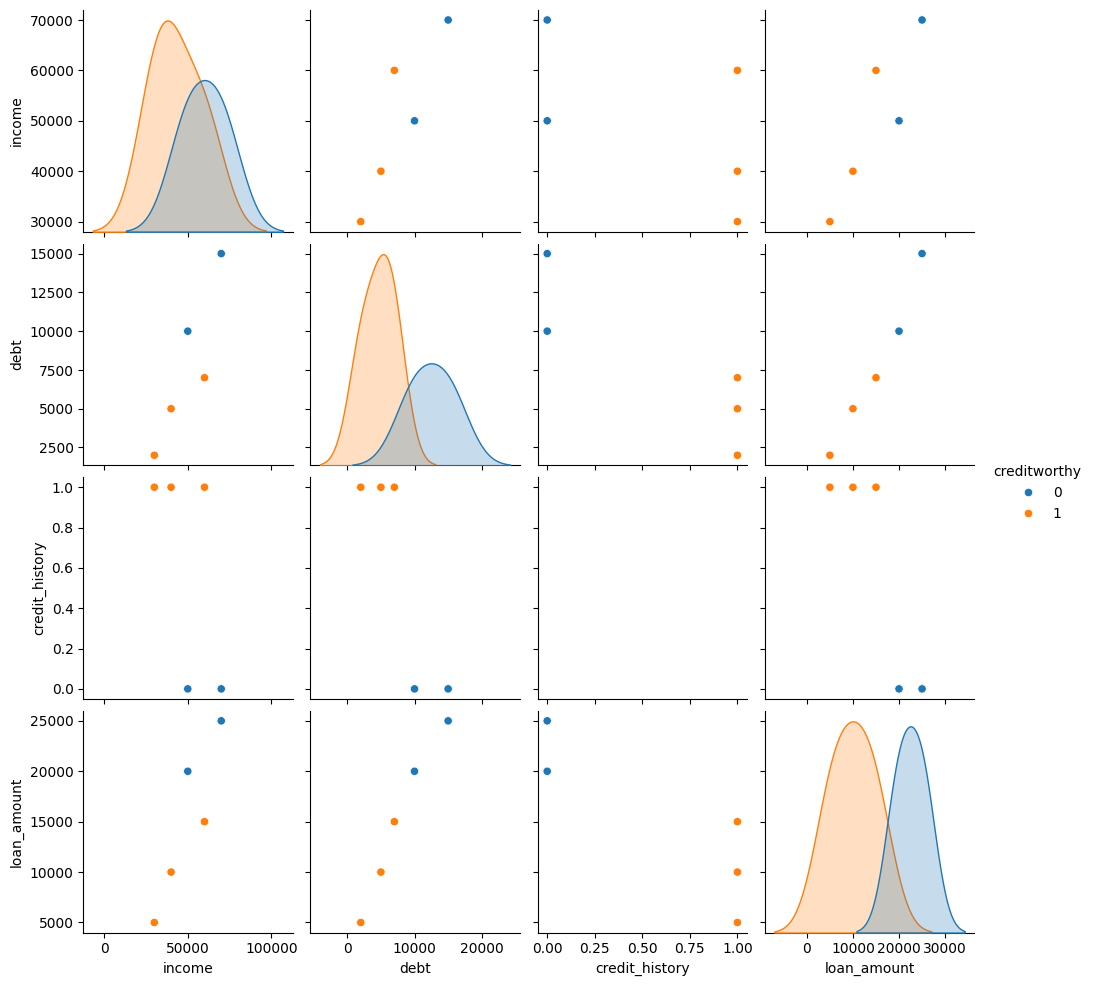

In [3]:
print(df.head())
print(df.describe())
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Optional: Visualize relationships
sns.pairplot(df, hue='creditworthy')
plt.show()


# **Feature Scaling (Standardization)**

In [4]:
X = df.drop('creditworthy', axis=1)
y = df['creditworthy']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# **Train-Test Split**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# **Train the Model (Logistic Regression)**

In [6]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# **Make Predictions and Evaluate**

In [7]:
y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[0 1]
 [0 0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

Accuracy: 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

# ****